# Reti Neurali con Python e Numpy

## Classe per una Rete Neurale
Il processo di creazione di questa rete neurale è descritto passo passo in [questo articolo sul blog di ProfessionAI](http://blog.profession.ai/creare-una-rete-neurale-artificiale-da-zero/)

In [3]:
import numpy as np

class NeuralNetwork:

  """
  Questa classe rappresenta una Rete Neurale Artificiale
  per eseguire l'addestramento usare .fit(X, y)
  per eseguire delle predizioni usare .predict(X)
  """
  
  
  def __init__(self, hidden_layer_size=100):

    """Costruttore della classe

    Args:
      hiddel_layer_size (int, optional): numero di nodi nello strato nascosto
    """

    self.hidden_layer_size=hidden_layer_size
    
    
  def _init_weights(self, input_size, hidden_size):

    """Inizializzazione dei pesi

    Questa funzione inizializza i pesi a valori casuali
    e i bias a zero

    Args:
      input_size (int): numero di nodi nello strato di input
      hidden_size (int): numreo di nodi nello strato nascosto
    """

    self._W1 = np.random.randn(input_size, hidden_size)
    self._b1 = np.zeros(hidden_size)
    self._W2 = np.random.randn(hidden_size,1)
    self._b2 = np.zeros(1)

    
  def _accuracy(self, y_true, y_pred):

    """Calcolo dell'accuracy

    L'accuracy è una funzione di costo che ritorna
    la percentuale di classificazioni eseguite correttamente

    Args:
      y_true (ndarray): valori corretti delle osservazioni
      y_pred (ndarray): predizioni fornite dalla rete

    Returns:
      (float): valore dell'accuracy
    """

    return np.sum(y_true==y_pred)/len(y)
  
  
  def _log_loss(self, y_true, y_proba):

    """Calcolo della log loss
    
    La Log Loss (o Cross Entropy) è una funzione di costo
    che tiene conto anche della probabilità

    Args:
      y_true (ndarray): valori corretti delle osservazioni
      y_prob (ndarray): output della rete in forma di probabilità

    Returns_
      (float): valore della log loss
    """

    return -np.sum(np.multiply(y_true,np.log(y_proba))+np.multiply((1.0001-y_true),np.log(1.0001-y_proba)))/len(y_true)
  
  
  def _relu(self, Z):

    """Calcolo della ReLu

    La ReLu è una funzione di attivazione
    principalmente utilizzata per gli strati nascosti

    Args:
      Z (ndarray): output lineare di uno strato
    
    Returns:
      (ndarray): output post-attivazione dello strato
    """

    return np.maximum(Z, 0)

  
  def _sigmoid(self, Z):

    """Calcolo della Sigmoide

    La Sigmoide è una funzione di attivazione
    utilizzata negli strati di output per problemi
    di classificazione binaria

    Args:
      Z (ndarray): output lineare di uno strato
    
    Returns:
      (ndarray): output post-attivazione dello strato
    """

    return 1/(1+np.power(np.e,-Z))
  
  
  def _relu_derivative(self, Z):

    """Calcolo della derivata della ReLu

    La derivata della Relu è necessaria
    per eseguire la backpropagation

    Args:
      Z (ndarray): output lineare di uno strato
    
    Returns:
      (ndarray): derivate parziali della ReLu rispetto a Z
    """

    dZ = np.zeros(Z.shape)
    dZ[Z>0] = 1
    return dZ
    
               
  def _forward_propagation(self, X):

    """ Funzione che esegue la Propagazione in avanti

    Args:
      X (ndarray): matrice con le features degli esempi
    
    Returns:
      A2 (ndarray): vettore con l'output della rete
    """
                     
    Z1 = np.dot(X,self._W1)+self._b1

    A1 = self._relu(Z1)
    Z2 = np.dot(A1,self._W2)+self._b2
    A2 = self._sigmoid(Z2)
    
    self._forward_cache = (Z1, A1, Z2, A2)

    return A2.ravel()


  def predict(self, X, return_proba=False):

      """ Funzione che esegue la predizione

      Args:
        X (ndarray): matrice con le features degli esempi
        return_proba (bool, optional): se True la funzione ritorna
          anche le probabilità

      Returns:
        y (ndarray): array con le predizioni della rete
        proba (ndarray, optional): array con l'output dello strato di output
      """

      proba = self._forward_propagation(X)

      y = np.zeros(X.shape[0])
      y[proba>=0.5]=1
      y[proba<0.5]=0

      if(return_proba):
        return (y, proba)
      else:
        return y
                            
      
  def _back_propagation(self, X, y):

    """ Funzione che esegue la Backpropagation

    Args:
        X (ndarray): matrice con le features degli esempi
        y (ndarray): vettore cone il target degli esempi
  
    Returns:
       dW1 (ndarray): derivate parziali della funzione di costo
           rispetto ai pesi dello strato di input
       db1 (ndarray): derivate parziali della funzione di costo
           rispetto ai bias dello strato di input
       dW2 (ndarray): derivate parziali della funzione di costo
           rispetto ai pesi dello strato nascosto
       db2 (ndarray): derivate parziali della funzione di costo
           rispetto ai bias dello strato nascosto
    """

    Z1, A1, Z2, A2 = self._forward_cache
                   
    m = A1.shape[1]

    print(m)
    
    dZ2 = A2-y.reshape(-1,1)
    dW2 = np.dot(A1.T, dZ2)/m
    db2 = np.sum(dZ2, axis=0)/m

    dZ1 = np.dot(dZ2, self._W2.T)*self._relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)/m
    db1 = np.sum(dZ1, axis=0)/m
    
    return dW1, db1, dW2, db2
           
               
  def fit(self, X, y, epochs=200, lr=0.01):

    """Funzione che esegue il Gradient Descent

    Args:
        X (ndarray): matrice con le features degli esempi
        y (ndarray): vettore cone il target degli esempi
        epochs (int, optional): numero di epoche per il gradient descent
        lr (float, optional): valore del learning rate
    """

    self._init_weights(X.shape[1], self.hidden_layer_size)
      
    for _ in range(epochs):
      Y = self._forward_propagation(X)
      dW1, db1, dW2, db2 = self._back_propagation(X, y)
      self._W1-=lr*dW1
      self._b1-=lr*db1
      self._W2-=lr*dW2
      self._b2-=lr*db2
               

  def evaluate(self, X, y):

    """Funzione che valuta la rete calcolando le metriche

    Args:
        X (ndarray): matrice con le features degli esempi
        y (ndarray): vettore cone il target degli esempi

    Returns:
       (float): valore dell'Accuracy
       (float): valore della Log Loss

    y_pred, proba = self.predict(X, return_proba=True)
    accuracy = self._accuracy(y, y_pred)
    log_loss = self._log_loss(y, proba)
    return (accuracy, log_loss)

SyntaxError: ignored

## Testiamo la Rete Neurale
Testiamo la nostra rete neurale su un problema abbastanza semplice, distinguere immagini di 1 da immagini di 0. Ho estratto dal [MNIST dataset](http://yann.lecun.com/exdb/mnist/), un popolare dataset di immagini di cifre scritte a mano, immagini di 0 e 1. Le immagini si trovano all'interno della cartella mnist, in due sottocartelle specifiche per le due classi.Possiamo aprire un'immagine utilizzando la libreria PIL e visualizzarla con la funzione *imshow* di Matplotlib.

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow

img = Image.open("mnist/0/1.jpg")
imshow(img)

FileNotFoundError: ignored

Nel caso di un'immagine le features della rete neurale saranno i pixel che la compongono, per poterli utilizzare dobbiamo srotolare la matriche di pixel in un unico vettore, questo processo è chiamato flattening. Utilizziamo la libreria PIL di Python per caricare ogni immagine all'interno di un ciclo, convertiamola in un array numpy, eseguiamo il flattening e aggiungiamo il vettore risultate alla matrice di features.

In [0]:
import numpy as np
from os import listdir

labels = [0,1]

X = np.array([])
y = np.array([])

for label in labels:
    for f in listdir("mnist/%d" % label):
        if(".jpg" in f):
            img = Image.open("mnist/%d/%s" % (label, f))
            x = np.array(img)
            x = x.reshape(1,28*28)
            if(X.size==0):
                X = x
            else:
                X = np.concatenate((X,x))
            y = np.append(y,label) 

Ora dobbiamo dividere gli array per l’addestramento e per il test. Questa divisione serve per poter verificare le reali capacità predittive del modello, testandolo su dati che non ha già visto durante la fase di addestramento. L’overfitting di cui abbiamo accennato all’inizio è la condizione in cui il modello memorizza i dati di addestramento piuttosto che apprendere da essi, avere un set di test separato ci permette di identificare questa situazione. Creiamo una funzione train_test_split per eseguire questa divisione:

In [0]:
def train_test_split(X, y, test_size=0.3, random_state=None):

      if(random_state!=None):
        np.random.seed(random_state)

      n = X.shape[0]

      test_indices = np.random.choice(n, int(n*test_size), replace=False) # selezioniamo gli indici degli esempi per il test set

      # estraiamo gli esempi del test set
      # in base agli indici

      X_test = X[test_indices]
      y_test = y[test_indices]

      # creiamo il train set
      # rimuovendo gli esempi del test set
      # in base agli indici

      X_train = np.delete(X, test_indices, axis=0)
      y_train = np.delete(y, test_indices, axis=0)

      return (X_train, X_test, y_train, y_test )


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

Normalizziamo le features, in modo tale da fare in modo che ogni feature sia in una scala da 0 a 1, dividendo la matrice per 255, cioè il valore massimo possible per un pixel.

In [0]:
X = X/255.

Perfetto ! Adesso creiamo la nostra rete con 10 nodi sullo strato nascosto, addestriamola sul set di addestramento per 500 epoche e valutiamola sul set di test. 

In [0]:
model = NeuralNetwork()
model.fit(X_train, y_train, epochs=500, lr=0.01)
model.evaluate(X_test, y_test)

(0.9966666666666667, 0.020215191704476693)


Dato che i pesi vengono inizializzati a valori casuali il risultato può lievemente variare tra diverse esecuzioni della rete. Nel mio caso l'accuracy è del 99.7%, questo vuol dire che il nostro modello ha classificato correttamente il 99.7% delle immagini nel set test, un'ottimo risultato ! Utilizziamo matplotlib con la funzione *imshow* per stampare alcune immagini e vedere come sono state classificate dalla rete.

Immagine classificata come 1


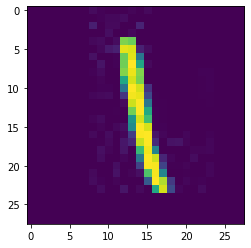

Immagine classificata come 1


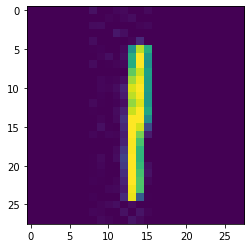

Immagine classificata come 1


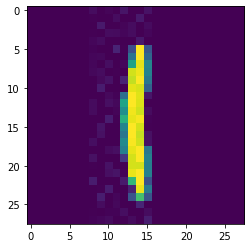

Immagine classificata come 0


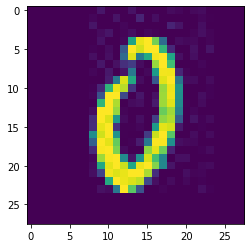

Immagine classificata come 1


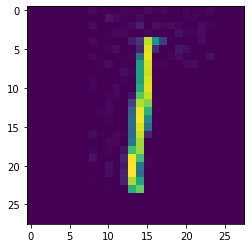

Immagine classificata come 0


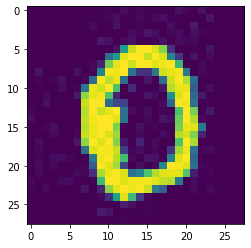

Immagine classificata come 1


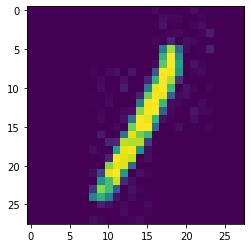

Immagine classificata come 0


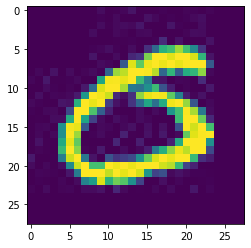

Immagine classificata come 0


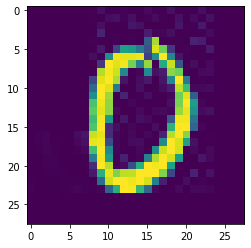

Immagine classificata come 1


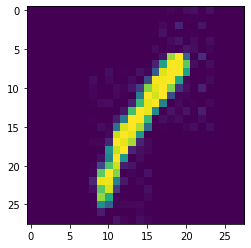

Immagine classificata come 1


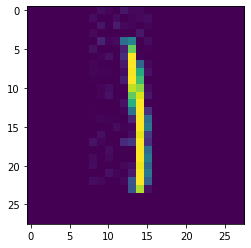

Immagine classificata come 0


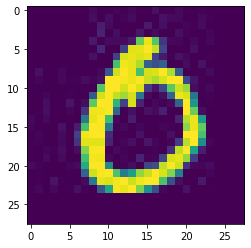

Immagine classificata come 1


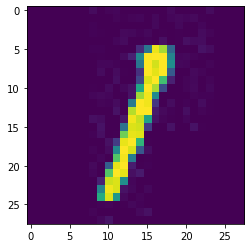

Immagine classificata come 0


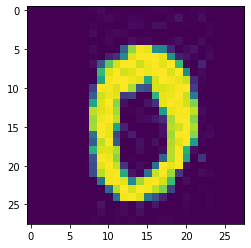

Immagine classificata come 1


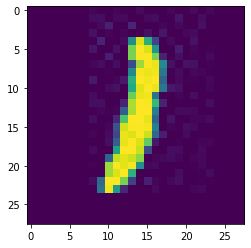

Immagine classificata come 1


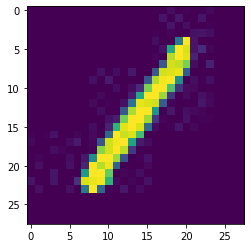

Immagine classificata come 1


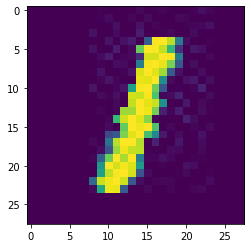

Immagine classificata come 0


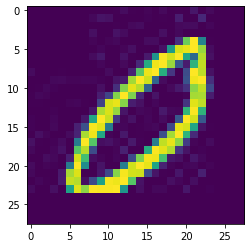

Immagine classificata come 1


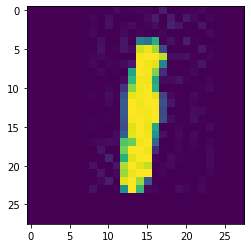

Immagine classificata come 0


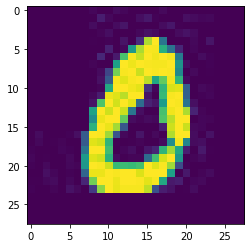

In [0]:
for i in range(0,20):
    print("Immagine classificata come %d" % y_test[i])
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()